In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import response_factor as rsp

# 松尾の留数定理による単位応答の計算

## 参考文献
松尾陽、横山浩一、石野久彌、川元昭吾：空調設備の動的熱負荷計算入門

## 使用するライブラリ
numpy
math
Tuple

## 補足説明
Laplace逆変換には、Heavisideの部分分数展開定理を用いて4端子行列のB(s)=0をニュートンラプソン法で求めている。重根が出る場合はうまく根が求まっていないため、calc_Bsを用いて重根をチェックするとよい

## 多層壁熱抵抗の計算

## 試算条件
| 建材 | 厚さ[mm] | 熱伝導率[W/(m･K)] | 容積比熱[J/(m3･K)] |
| ---- | ---- | ---- | ---- |
| 室内表面熱伝達 | - | 9 | 0 |
| 吹付け硬質ウレタンフォームA 種1 | 50 | 0.034 | 61 |
| コンクリート | 100 | 1.6 | 2000 |
| 室外側表面熱伝達 | - | 23 | 0 |

In [2]:
rs = np.array([
        1.0 / 9.0,
        0.05 / 0.034,
        0.1 / 1.6,
        1.0 / 23.0
    ])

## 多層壁熱容量の計算

In [3]:
cs = np.array([
        0.0,
        61.0 * 0.05 * 1000.0,
        2000 * 0.1 * 1000.0,
        0.0 
    ])

## 根の計算

In [4]:
(a0, aa, at, alpha) = rsp.calc_alpha_matsuo_method(rs=rs, cs=cs, i_max=20)

## 単位応答の計算

In [5]:
phi_a, phi_t = rsp.calc_step_respose_factor(aa=aa, at=at, alpha=alpha, a0=a0, n_max=50, delta_t=900)

# 二等辺三角波励振の応答係数の計算

In [6]:
rft_a, rft_t = rsp.calc_triangle_response_factor(aa=aa, at=at, alpha=alpha, a0=a0, n_max=50, delta_t=900)

# 4端子行列のB(s)を取得

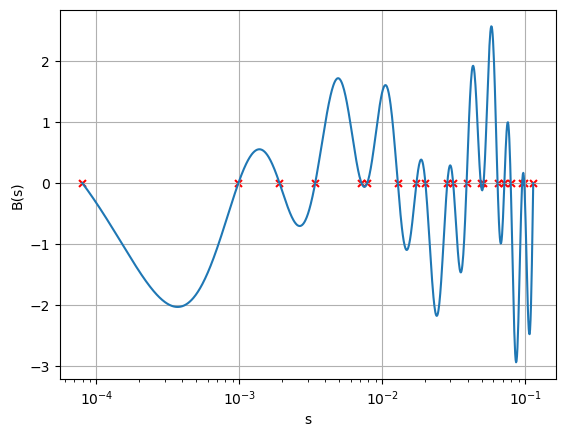

In [7]:
laps, Bs = rsp.calc_Bs(rs=rs, cs=cs, alpha=alpha)
zero = np.zeros_like(alpha)
plt.scatter(laps, Bs, marker="None")
plt.scatter(alpha, zero, marker='x', c='r', s=25)
plt.plot(laps, Bs)
plt.xlabel('s')
plt.ylabel('B(s)')
plt.xscale('log')
plt.grid()
plt.show()

## グラフ描画

In [8]:
pd_phi_a = pd.Series(phi_a)
pd_phi_t = pd.Series(phi_t)
pd_rft_a = pd.Series(rft_a)
pd_rft_t = pd.Series(rft_t)

<Axes: title={'center': 'rft_t'}>

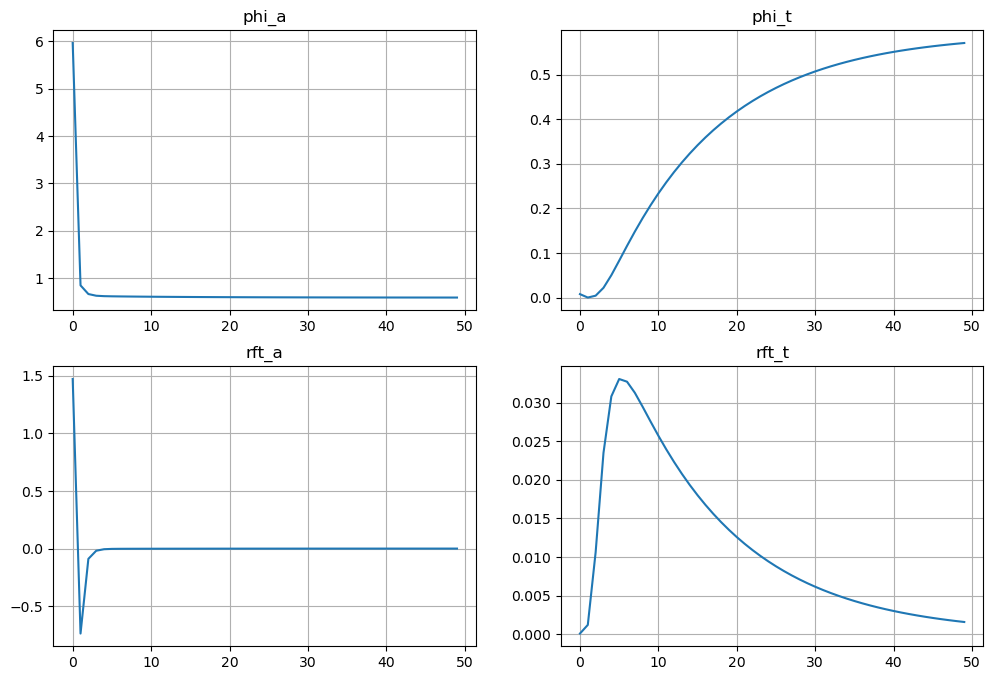

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

pd_phi_a.plot(ax=axes[0, 0], kind='line', title='phi_a', grid=True)
pd_phi_t.plot(ax=axes[0, 1], kind='line', title='phi_t', grid=True)
pd_rft_a.plot(ax=axes[1, 0], kind='line', title='rft_a', grid=True)
pd_rft_t.plot(ax=axes[1, 1], kind='line', title='rft_t', grid=True)